# Stats sub-module

The ```acgc.stats``` sub-module is a collection of statistical methods. See ```help(acgc.stats)``` for complete list of methods.

The most commonly used functions include BivariateStatistics, line fitting methods (sma, sen, york), and weighted statistics (wmean, wmedian, wcov, wcorr, etc.).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from acgc import stats as mystats
from acgc import figstyle

## BivariateStatistics
This function quickly computes many statistical measures of the relationship between two populations.

As an example, we will create samples of two populations with a linear relationship between them, which is obscured by noise added to both 

In [3]:
# Generate two sample populations
n = 100
x_true = np.random.rand(n) + 2
y_true = 2*x_true + 1 

# Add noise with normal distribution
x = x_true + np.random.randn(n)*0.1
y = y_true + np.random.randn(n)*0.3

Use `BivariateStatistics` to compute statistical relationships and `summary()` to display some of the most commonly used statistics. 

In [4]:
# Compute bivariate statistics
result = mystats.BivariateStatistics(x,y)

# Display a table showing some common statistical measures of population differences
print(result.summary())

MD    = 3.5359
MAD   = 3.5359
RMD   = 1.4353
RMAD  = 1.4353
MRD   = 1.4427
R2    = 0.6839
slope = 2.2886



The abbreviations seen in the `summary()` output are defined in the documentation for the `result` variable.

In [ ]:
# Show documentation including abbreviations
help(result)

Users can specify which variables they want to include in the summary output and the type of line fitting that they want to use (SMA, OLS, WLS, Theil-Sen, York)

In [6]:
# Specify exactly which variables to include in the summary
#   mean difference (MD)
#   Median difference (MedD)
#   slope (SMA method)
#   intercept (SMA method)
#   Pearson correlation (R)
display_vars = ['MD','MedD','slope','intercept','R']

# Summarize, using OLS line fitting
print(result.summary(display_vars, 
    fitline_kw={'method':'OLS'}))

MD        = 3.5359
MedD      = 3.5411
slope     = 1.8926
intercept = 1.3371
R         = 0.8270



### Show a figure with summary statistics as an inset table

The summary table can be written on a figure. 

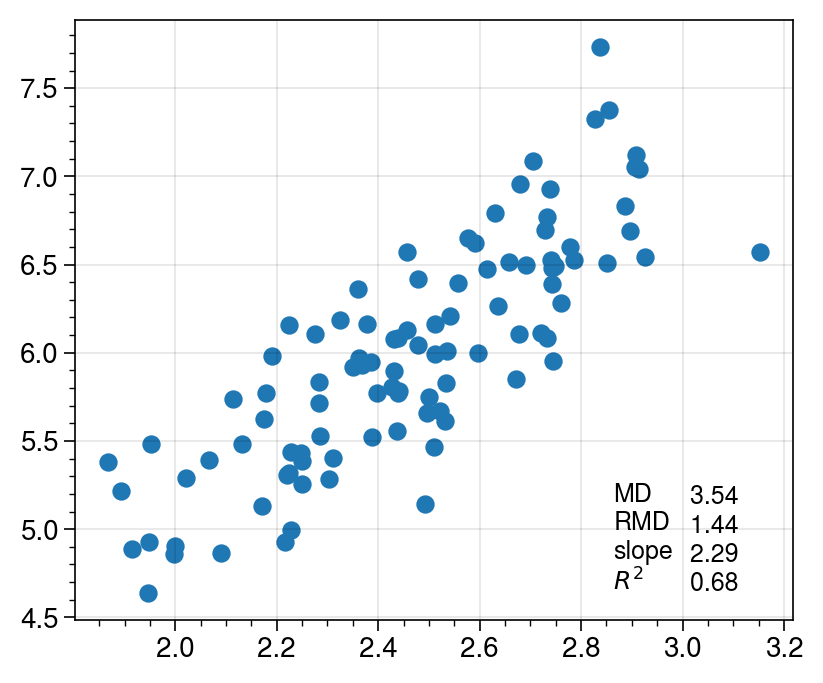

In [7]:
# Plot data
ax = plt.subplot()
ax.scatter(x,y)

# Add text displaying slope and R2
t=result.summary_fig_table(ax,
                         ['MD','RMD','slope','R2'],
                         floatformat='{:5.2f}',
                         loc=(0.75,0.05), loc_units='axes',
                         fontsize=9)

## Weighted statistics

Weighted versions of mean, standard deviation, covariance, etc. are available. The functions names follow the numpy functions prefixed with 'w'. For example 'wmean' is the weighted mean and 'wstd' is the weighted standard deviation. When weights are equal to 1, the result is identical to the unweighted statistic.

In [11]:
# Generate hypothetical weights. These should be positive
w = (np.random.randn(n)+1)**2

# Print some weighted statistics
print('Weighted mean:', mystats.wmean(x,w) )
print('Weighted std:',  mystats.wstd(x,w))
print('Weighted covariance:', mystats.wcov(x,y,w))
print('Standard covariance:', mystats.wcov(x,y,np.ones_like(x)))


Weighted mean:  2.431814616080641
Weighted std: 0.27380121568197974
Weighted covariance: 0.13680414193311458
Standard covariance: 0.14796233496639685


With the `robust` keyword, the sample weights are computed internally to reduce the influence of extreme outliers. 

In [23]:
# Add some extreme outliers
xoutliers = x + np.random.standard_cauchy(n)**2

# The outliers affect the mean much more than the robust mean
print('Standard mean:', np.mean(xoutliers))
print('Robust mean:', mystats.wmean(xoutliers,robust=True))

Standard mean: 15.934330789008387
Robust mean: 4.637920164158685


/Users/cdholmes/anaconda3/envs/general/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(
